In [99]:
## MANE 4962 Homework 3 Question 4
# Load Modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *

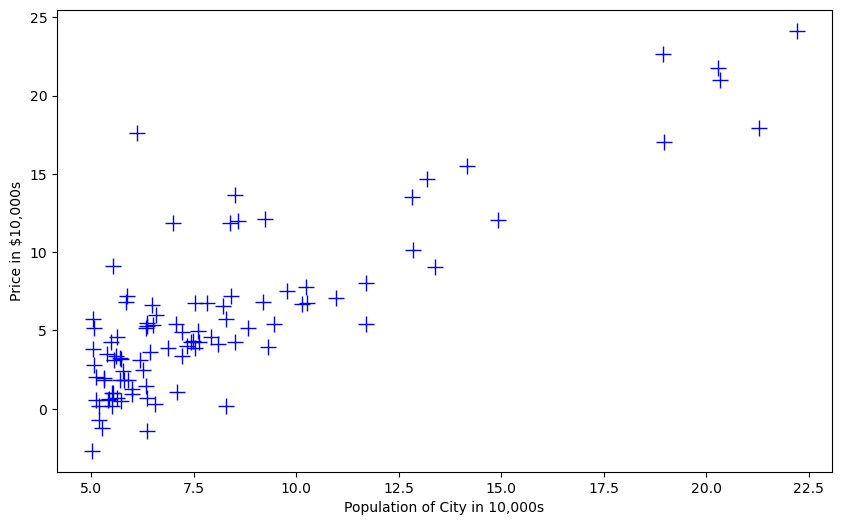

In [78]:
""" Open Data from source """
# Load Data and Visualize Data (Code from HW3 Dataloader)
datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')
plt.show()

In [79]:
# Data Modification
X = X[:,1]
# X = X.reshape([97,1])

In [80]:
# Spliting Dataset to 70/30 Split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.30,
    train_size=0.70, 
    random_state = 15)

# Display Data
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (67,)
X_test shape : (30,)
y_train shape : (67, 1)
y_test shape : (30, 1)


In [81]:
# Neural Network (Single hidden layer and two neurons)
model = Sequential()

model.add(Dense(2, activation='relu', input_dim = 1))
model.add(Dense(1))
opt = keras.optimizers.SGD(learning_rate = 0.01) # Optimizer = Stochastic Gradient Descent Method
model.compile(loss = 'mean_squared_error', metrics = ['accuracy']) # Mean Squared Error = Loss
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
# Fit the model 
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.0000e+00 - loss: 13.9416 - val_accuracy: 0.0000e+00 - val_loss: 14.9369
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.0000e+00 - loss: 12.9994 - val_accuracy: 0.0000e+00 - val_loss: 14.4570
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0000e+00 - loss: 13.6510 - val_accuracy: 0.0000e+00 - val_loss: 14.2570
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0000e+00 - loss: 12.1051 - val_accuracy: 0.0000e+00 - val_loss: 13.9978
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0000e+00 - loss: 13.4021 - val_accuracy: 0.0000e+00 - val_loss: 13.7929
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0000e+00 - loss: 12.7720 - val_accuracy: 0.0000e+00 - val_loss: 13.6145
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0000e+00 - loss: 13.4111 - val_accuracy: 0.0000e+00 - val_loss: 13.4651
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - acc

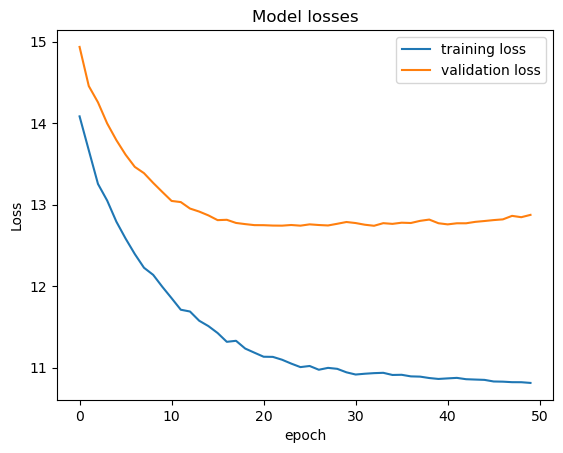

In [83]:
# Plot the training and validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model losses')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'])
plt.show()

In [95]:
# Test out model
error = model.evaluate(X_test, y_test) # Evaluate Mean Square Error
price_pre = model.predict(np.array([16.5])) # Evaluate at 16.5 which is 165000 people
print("MSE:", error[0])
print("The predict price of a house for a population of 165,000 people is:", price_pre,"The price is in the $10000.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 12.8761
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MSE: 12.876147270202637
The predict price of a house for a population of 165,000 people is: [[13.043965]] The price is in the $10000.


In [101]:
# Answer to Question 4

### The trends found in the training and validation loss plots vary with each run. A probably cause is that the data is
### ill-suited to be fitted resulting in various outcome per run. In several runs, both traning and validation loss are
### extermly high resulting in bad predicition and high mean squared error. In other runs the neural network provide good predicition, resulting
### in less error and better predicition of house prices. 

### When the validation loss and the training loss are both realtive high, the neural network is underfitting the model. 
### While the validation loss and the training loss are at equillibrium, the neural network is in appropriate capacity (correctly fitting the model).
### Fianlly, when validation loss is increasing and the traning loss is decreasing (a gap forms) the neural network is overfitting the model.

### In general throughout multiple runs, the number of epoch to minimize loss is around 50. The learning rate to minimize loss is 0.01.